In [1]:
import characterizethis as ct
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import lightkurve as lk 
plt.style.use(lk.MPLSTYLE)

In [2]:
df = ct.get_data()

In [3]:
special = ['K2-43', 'K2-198', 'K2-168']

1975    3889.72
Name: st_teff, dtype: float64
2751    5262.0
Name: st_teff, dtype: float64
2971    5554.0
Name: st_teff, dtype: float64


(16, 3)

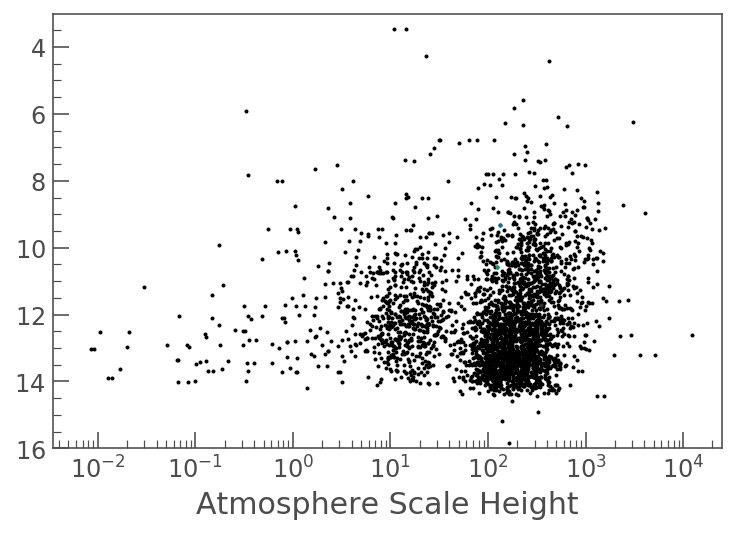

In [4]:
plt.scatter(df.H, df.st_h, c='k', s=1)
for target in special:
    k = df.pl_hostname == target
    plt.scatter(df[k].H, df[k].st_h)
    print(df[k].st_teff)
plt.xscale('log')
plt.xlabel('Atmosphere Scale Height')
plt.ylim(16, 3)

/Users/ch/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


(12, 4)

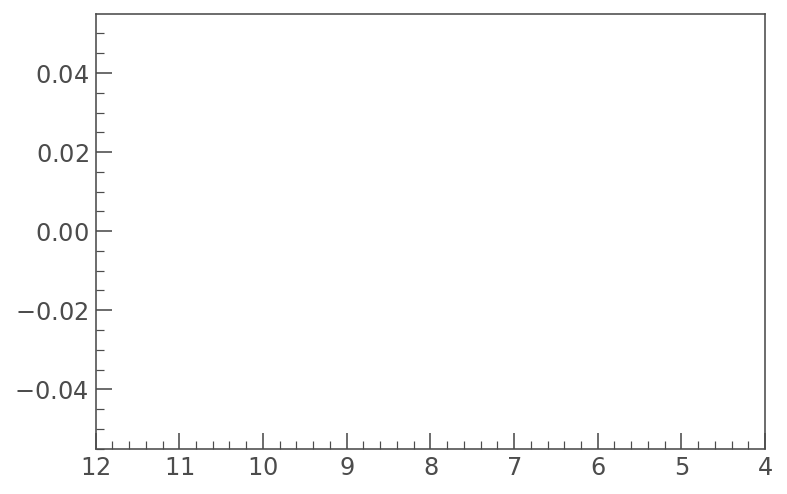

In [5]:
depth = (((np.asarray(df.pl_rade) * u.earthRad).to(u.solRad)/(np.asarray(df.st_rad) * u.solRad)).value)**2
k = (df.snr > 10) & ((depth) > 0.001) & (df.pl_tranflag == 1) & (df.st_h < 12)
plt.scatter(df[k].st_h, df[k].snr, s=df[k].pl_rade*10, facecolor='None', edgecolor='r')
plt.xlim(12, 4)

In [6]:
import lightkurve as lk
import threemultis
import matplotlib.pyplot as plt
import pickle
import numpy as np
from astropy.stats import BoxLeastSquares
import itertools

/Users/ch/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
letters = ['b', 'c', 'd']

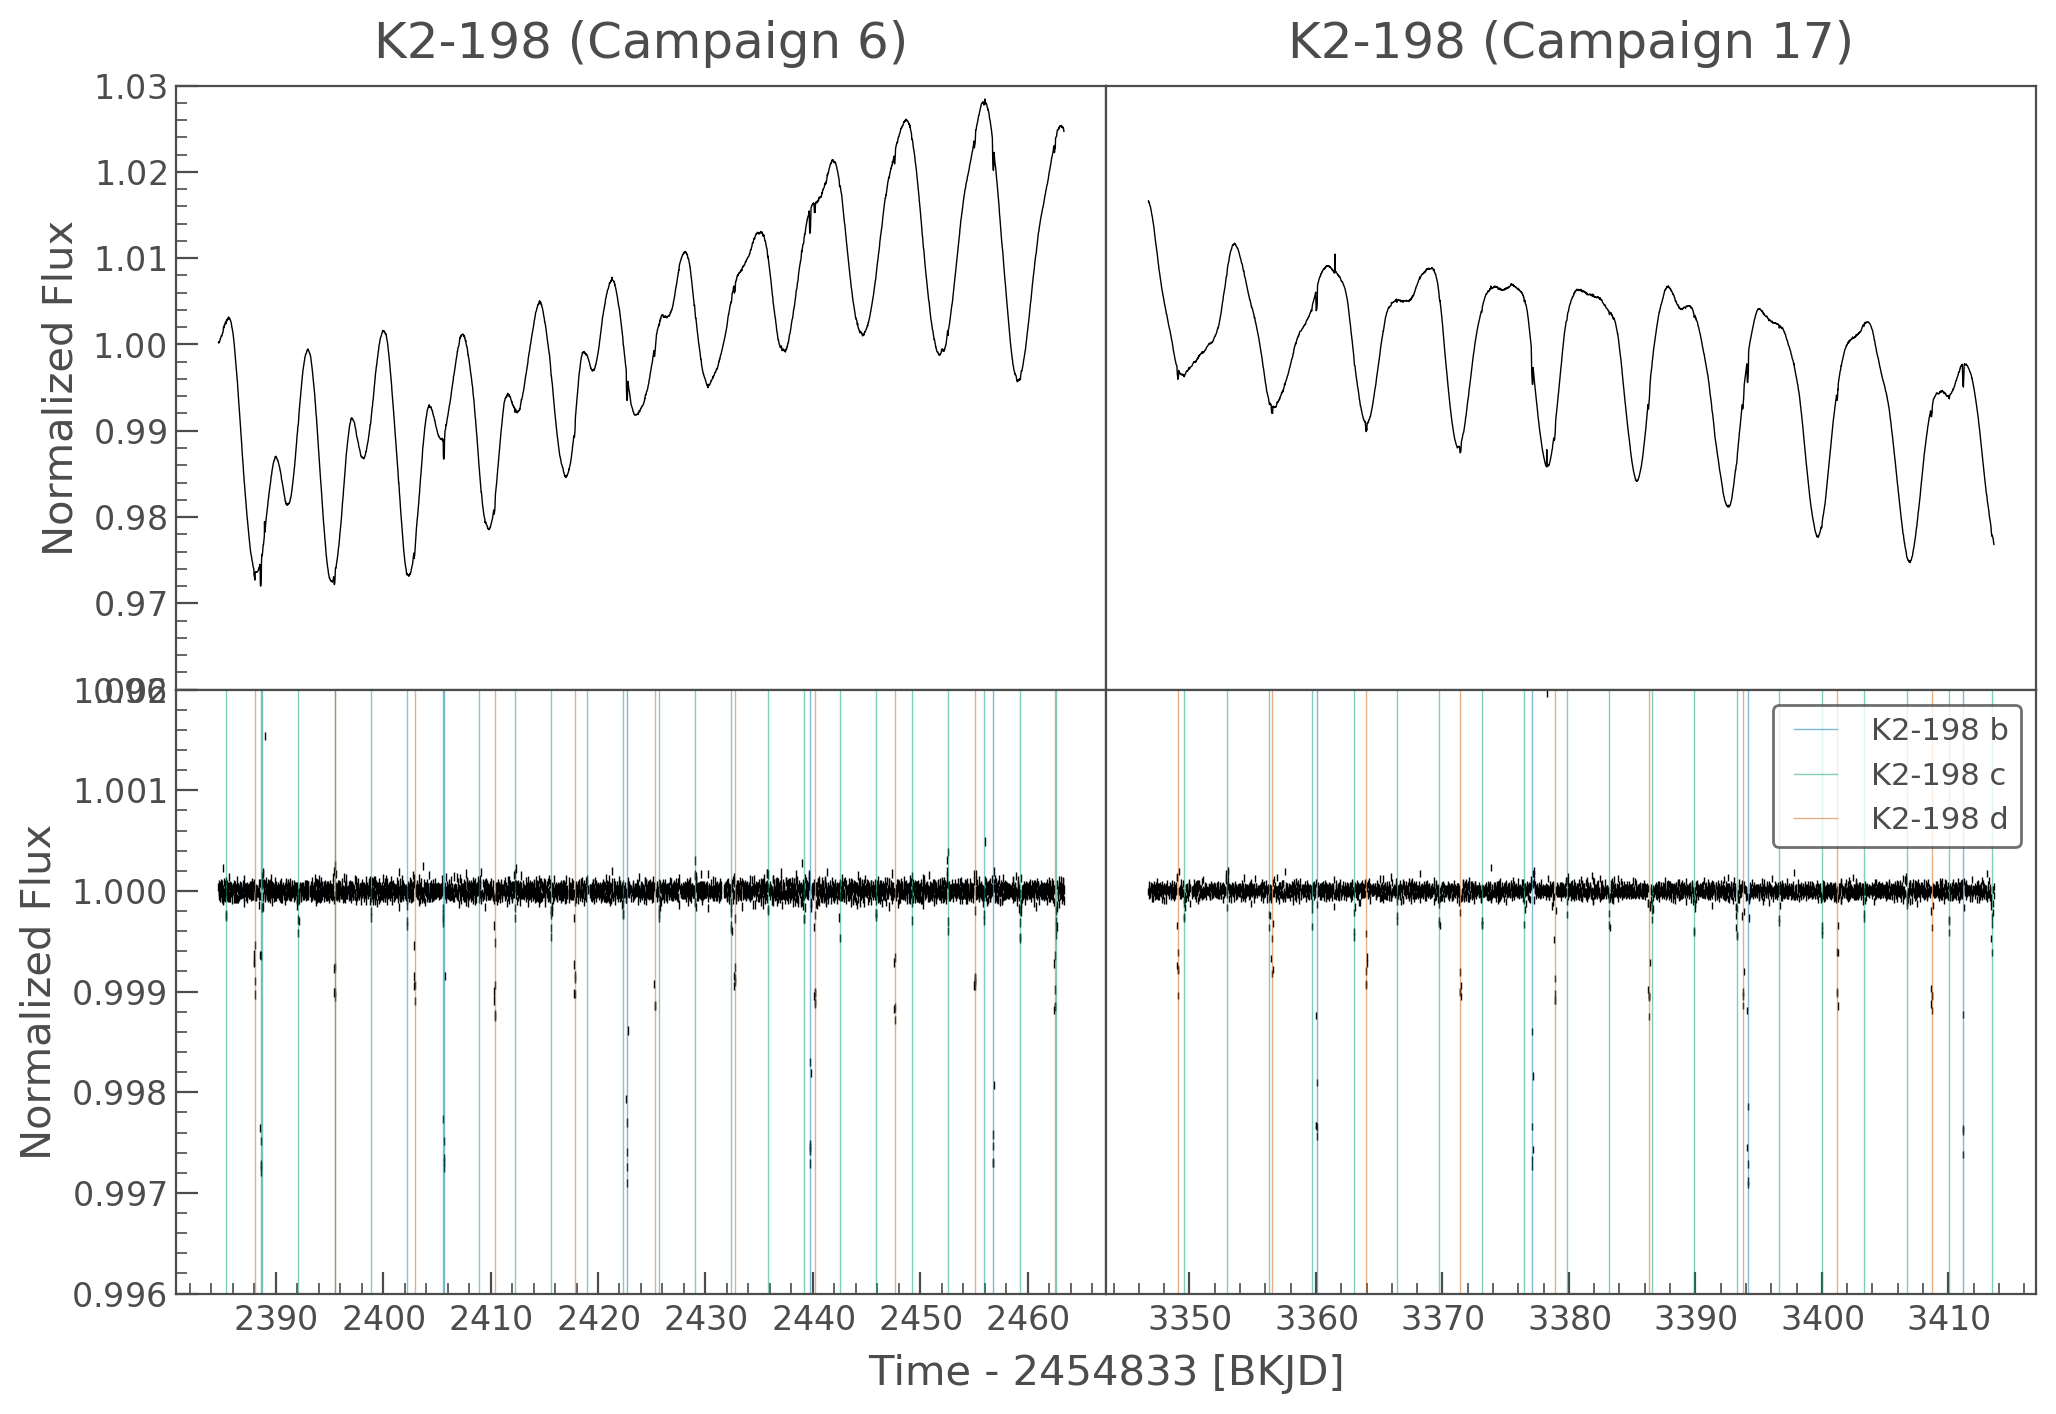

In [8]:
samples = pickle.load(open('{}/results/K2-198_samples.p'.format(threemultis.PACKAGEDIR), 'rb'))

fig = plt.figure(figsize=(12, 8))
for idx in range(2):
    ax = plt.subplot2grid((2, 2), (0, idx), fig=fig)
    lc = pickle.load(open('{}/results/K2-198_{}.p'.format(threemultis.PACKAGEDIR, idx), 'rb'))
    if idx == 0:
        (lc + (np.median(lc.meta['pred_mu'], axis=0) * 1e-6)).plot(ax=ax, c='k', label='')
        ax.set_title('K2-198 (Campaign 6)')
    else:
        (lc + (np.median(lc.meta['pred_mu'], axis=0) * 1e-6)).plot(ax=ax, c='k', label='')
        ax.set_title('K2-198 (Campaign 17)')

    if idx == 1:
        ax.set_ylabel('')
        ax.get_yaxis().set_visible(False)
    ax.set_ylim(0.96, 1.03)
    ax.set_xlabel('')
    ax.get_xaxis().set_visible(False)

    
for idx in range(2):
    ax = plt.subplot2grid((2, 2), (1, idx), fig=fig)
    lc = pickle.load(open('{}/results/K2-198_{}.p'.format(threemultis.PACKAGEDIR, idx), 'rb'))
    
    if idx == 0:
        (lc).errorbar(ax=ax, c='k', label='')
    else:
        (lc).errorbar(ax=ax, c='k', label='')
    if idx == 1:
        ax.set_ylabel('')
        ax.get_yaxis().set_visible(False)
    ax.set_ylim(0.996, 1.002)
    for jdx in range(3):
        Period = np.exp(samples['logP__{}'.format(jdx)].mean())
        T0 = samples['t0__{}'.format(jdx)].mean()
        bls = BoxLeastSquares(lc.time, lc.flux)
        tt = bls.compute_stats(Period, 0.5, T0)['transit_times']
        for t in tt:
            if (t == tt[0]) & (idx == 1):
                ax.axvline(t, c='C{}'.format(jdx + 1), alpha=0.5, lw=0.5, label='K2-198 {}'.format(letters[jdx]))
            else:
                ax.axvline(t, c='C{}'.format(jdx + 1), alpha=0.5, lw=0.5)
    ax.set_xlabel('')
    
ax.set_xlabel('Time - 2454833 [BKJD]')
ax.xaxis.set_label_coords(0, -0.1)
ax.legend(loc='upper right')

    

flc = None
for idx in range(2):
    lc = pickle.load(open('{}/results/K2-198_{}.p'.format(threemultis.PACKAGEDIR, idx), 'rb'))
    if flc is None:
        flc = lc
    else:
        flc = flc.append(lc)
    
# ax = plt.subplot2grid((3, 2), (2, 0), colspan=2, fig=fig)


# p = flc.to_periodogram('bls', minimum_period=2, maximum_period=20, frequency_factor=100, duration=np.linspace(0.1, 0.9, 5))
# p.plot(ax=ax, label='')

# for jdx in range(3):
#     Period = np.exp(samples['logP__{}'.format(jdx)].mean())
#     for period in [Period, Period * 2, Period * 4, Period * 0.5, Period * 0.25, Period * 0.125, Period * (0.125/2)]:
#         if period == Period:
#             ax.axvline(period, c='C{}'.format(jdx + 1), alpha=0.5, lw=3, label='K2-198 {}'.format(letters[jdx]))
#         else:
#             ax.axvline(period, c='C{}'.format(jdx + 1), alpha=0.3, lw=3, ls='--')

# ax.set_xlim(2, 20)
# ax.legend()

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('../threemultis/results/figures/K2-198_lc.png', dpi=200, bbox_inches='tight')
plt.savefig('../threemultis/results/figures/K2-198_lc.pdf', bbox_inches='tight')

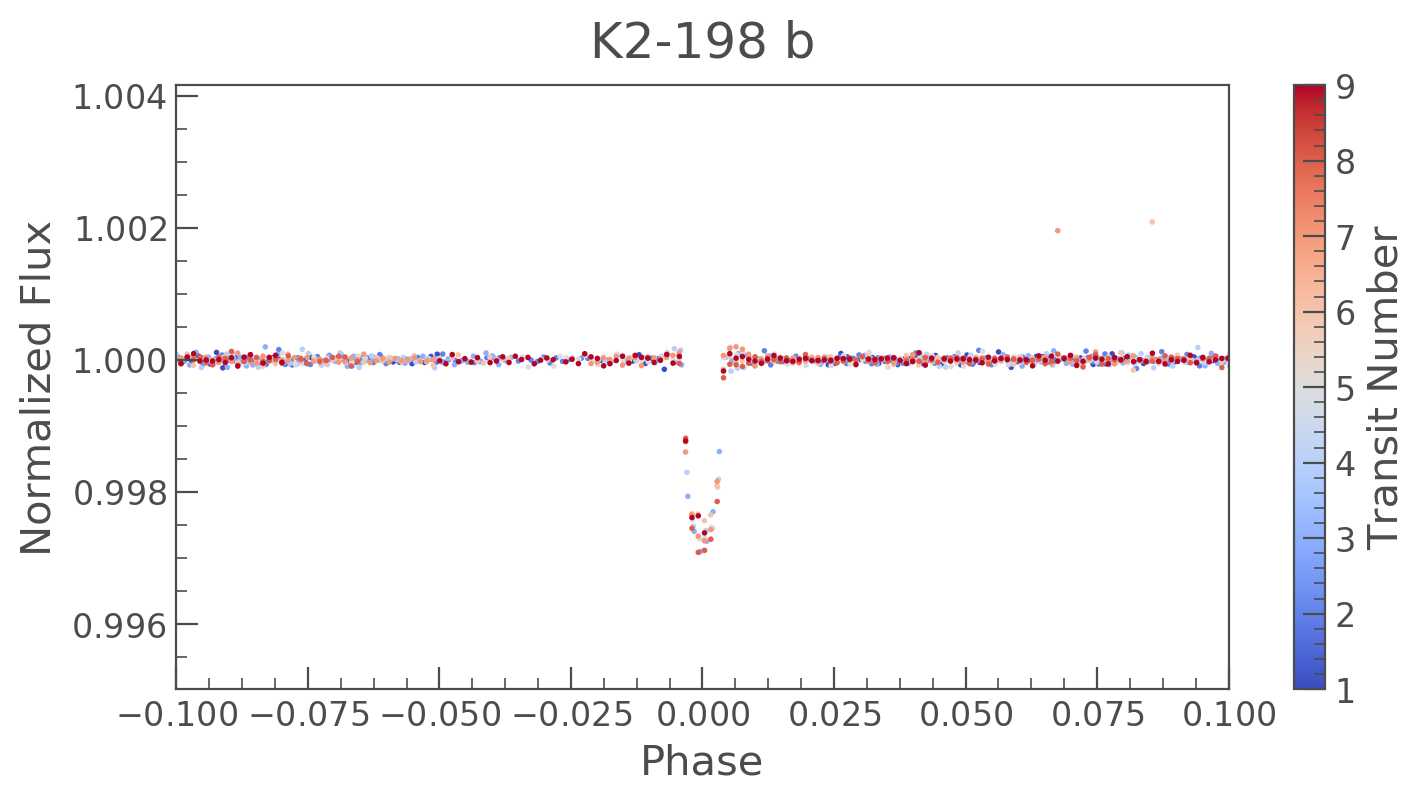

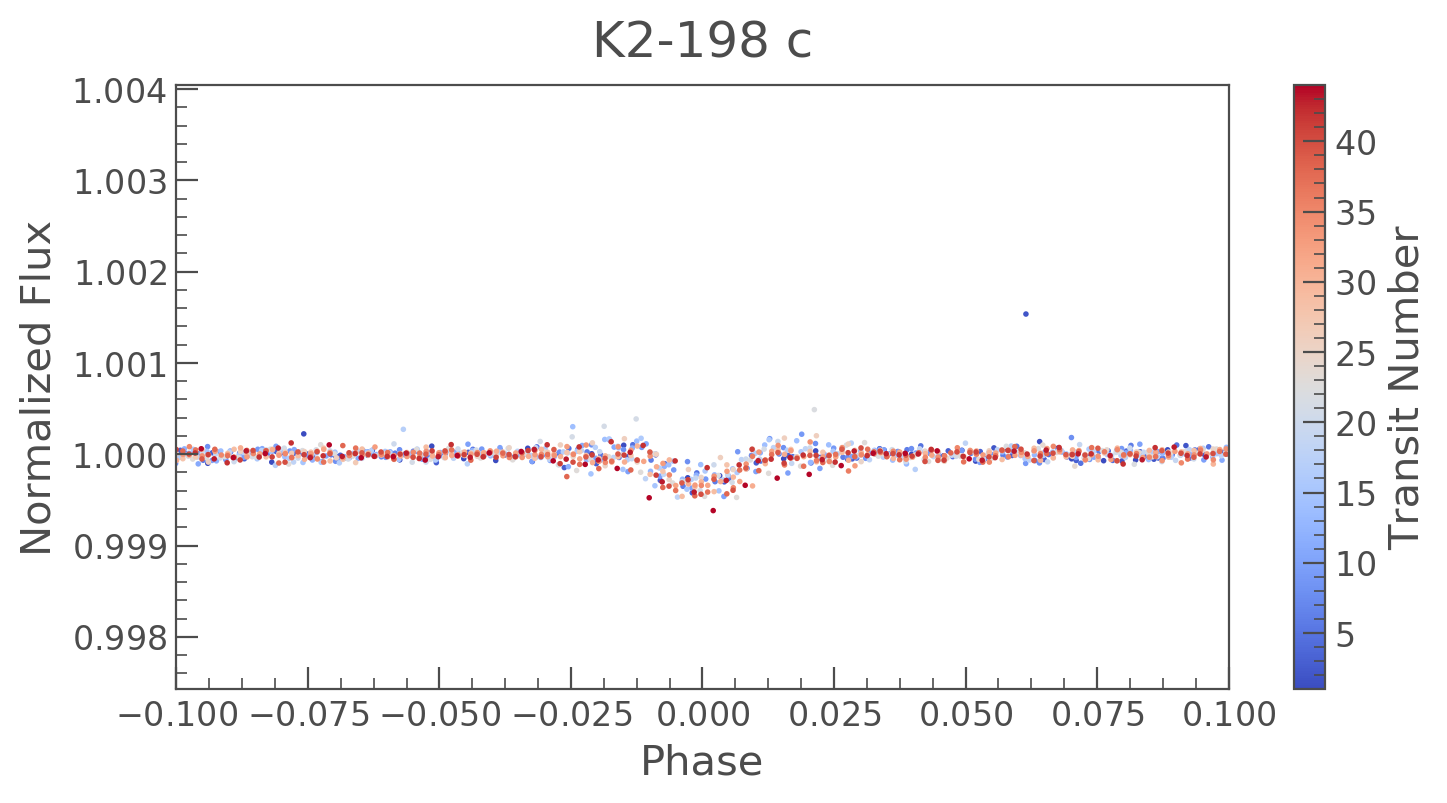

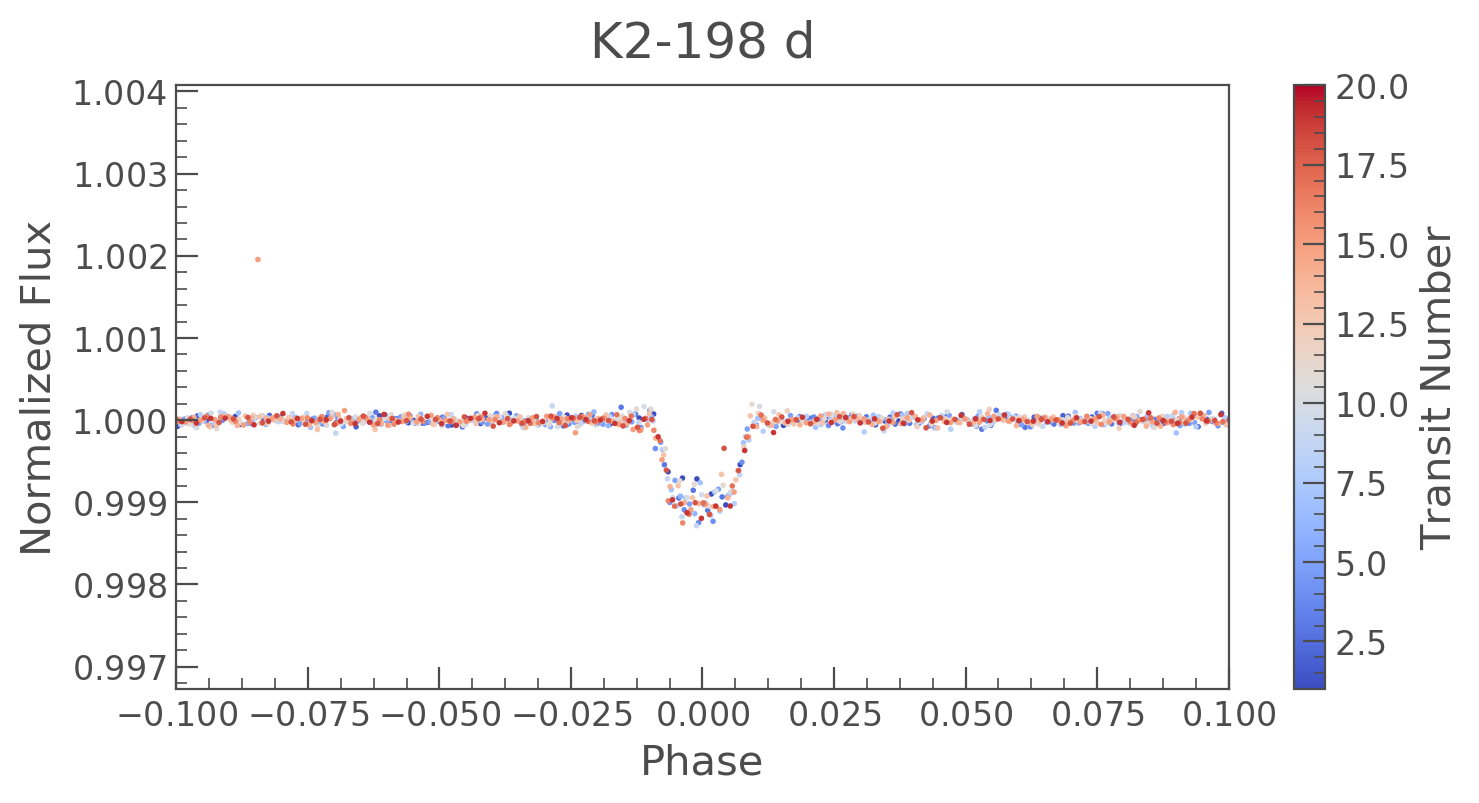

In [9]:
for jdx in range(3):
    mask = np.ones(len(flc.time), bool)
    for idx in list(set([0,1,2]) - set([jdx])):
        p1 = np.exp(samples['logP__{}'.format(idx)].mean())
        t01 = samples['t0__{}'.format(idx)].mean()
        d1 = 0.5
        x_fold = (flc.time - t01 + 0.5*p1) % p1 - 0.5*p1
        mask &= (np.abs(x_fold) > d1/2)
        
    Period = np.exp(samples['logP__{}'.format(jdx)].mean())
    T0 = samples['t0__{}'.format(jdx)].mean()
    
    phase = (T0 % Period) / Period
    fold_time = np.asarray(((flc.time - phase * Period) / Period) % 1)
    fold_time[fold_time > 0.5] -= 1
    idxs = np.where((np.gradient(fold_time) < -0.4) & (fold_time < 0))[0]
    colors = np.asarray(list(itertools.chain.from_iterable([np.ones(len(b), int) + int(i) for i, b in enumerate(np.array_split(fold_time, idxs))])))
    plt.figure()
    plt.scatter(fold_time[mask], flc.flux[mask], c=colors[mask], cmap='coolwarm', s=1)
    cbar = plt.colorbar()
    plt.xlabel('Phase')
    plt.ylabel('Normalized Flux')
    cbar.set_label('Transit Number')
    plt.title('K2-198 {}'.format(letters[jdx]))
    plt.xlim(-0.1, 0.1)

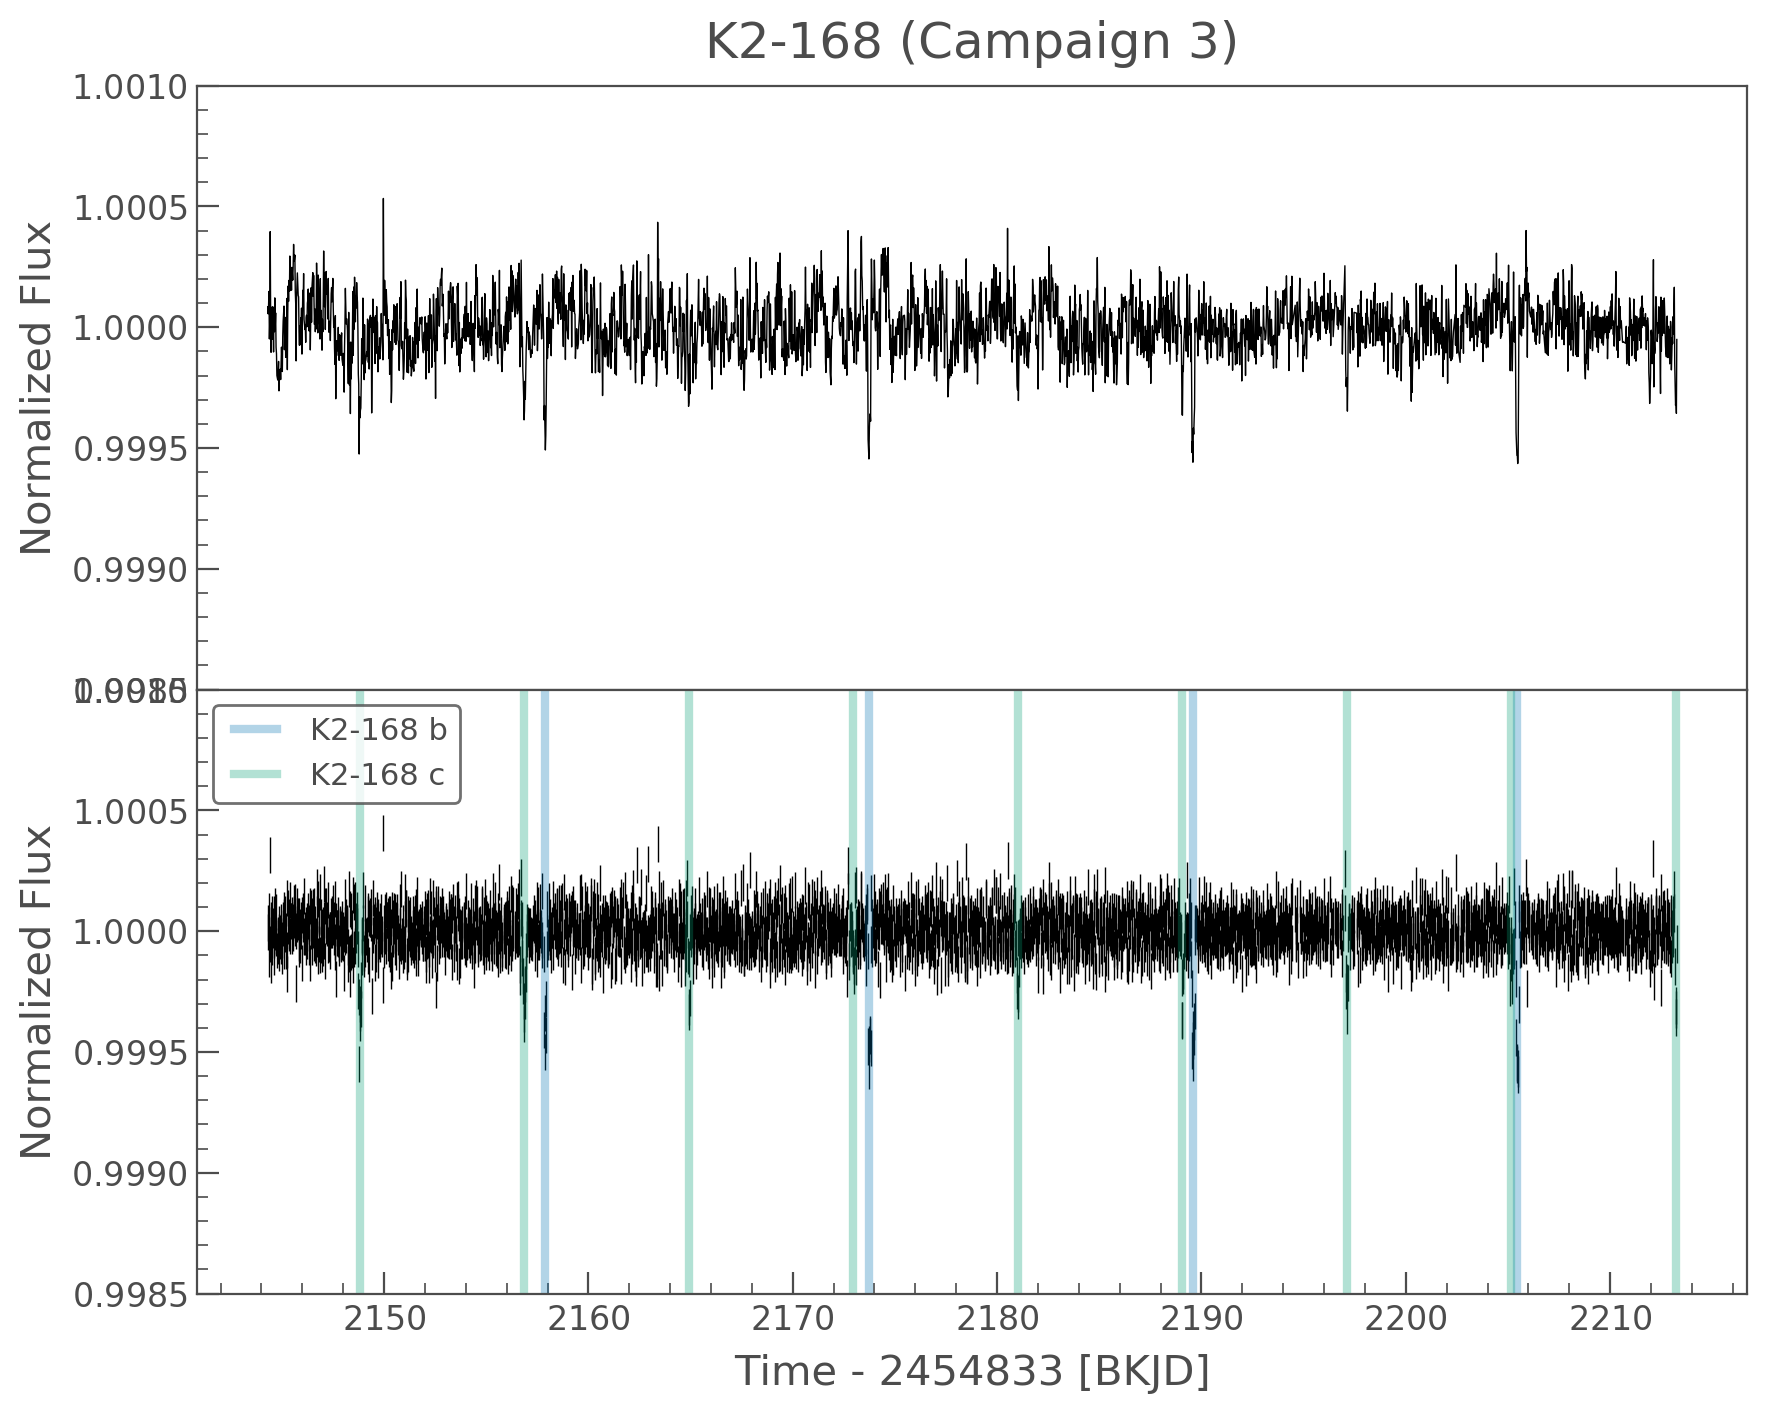

In [10]:
samples = pickle.load(open('{}/results/K2-168_samples.p'.format(threemultis.PACKAGEDIR), 'rb'))

fig = plt.figure(figsize=(10, 8))
ax = plt.subplot2grid((2, 1), (0, 0), fig=fig)
lc = pickle.load(open('{}/results/K2-168.p'.format(threemultis.PACKAGEDIR), 'rb'))
(lc + (np.median(lc.meta['pred_mu'], axis=0) * 1e-6)).plot(ax=ax, c='k', label='')
ax.set_xlabel('')
ax.get_xaxis().set_visible(False)
ax.set_ylim(0.9985, 1.001)
ax.set_title('K2-168 (Campaign 3)')

ax = plt.subplot2grid((2, 1), (1, 0), fig=fig)
(lc).errorbar(ax=ax, c='k', label='')
for jdx in range(2):
    Period = np.exp(samples['logP__{}'.format(jdx)].mean())
    T0 = samples['t0__{}'.format(jdx)].mean()
    bls = BoxLeastSquares(lc.time, lc.flux)
    tt = bls.compute_stats(Period, 0.5, T0)['transit_times']
    for t in tt:
        if (t == tt[0]) & (idx == 1):
            ax.axvline(t, c='C{}'.format(jdx + 1), alpha=0.3, lw=3, label='K2-168 {}'.format(letters[jdx]))
        else:
            ax.axvline(t, c='C{}'.format(jdx + 1), alpha=0.3, lw=3)

ax.set_xlabel('')
ax.set_xlabel('Time - 2454833 [BKJD]')
ax.xaxis.set_label_coords(0.5, -0.1)
ax.set_ylim(0.9985, 1.001)
ax.legend()



    
# ax = plt.subplot2grid((3, 1), (2, 0), colspan=2, fig=fig)

# p = lc.to_periodogram('bls', minimum_period=2, maximum_period=20, frequency_factor=1, duration=np.linspace(0.1, 0.9, 5))
# p.plot(ax=ax, label='')

# for jdx in range(2):
#     Period = np.exp(samples['logP__{}'.format(jdx)].mean())
#     for period in [Period, Period * 2, Period * 4, Period * 0.5, Period * 0.25, Period * 0.125, Period * (0.125/2)]:
#         if period == Period:
#             ax.axvline(period, c='C{}'.format(jdx + 1), alpha=0.5, lw=3, label='K2-168 {}'.format(letters[jdx]))
#         else:
#             ax.axvline(period, c='C{}'.format(jdx + 1), alpha=0.3, lw=3, ls='--')

# ax.set_xlim(2, 20)
# ax.legend()

plt.subplots_adjust(hspace=0)
plt.savefig('../threemultis/results/figures/K2-168_lc.png', dpi=200, bbox_inches='tight')
plt.savefig('../threemultis/results/figures/K2-168_lc.pdf', bbox_inches='tight')

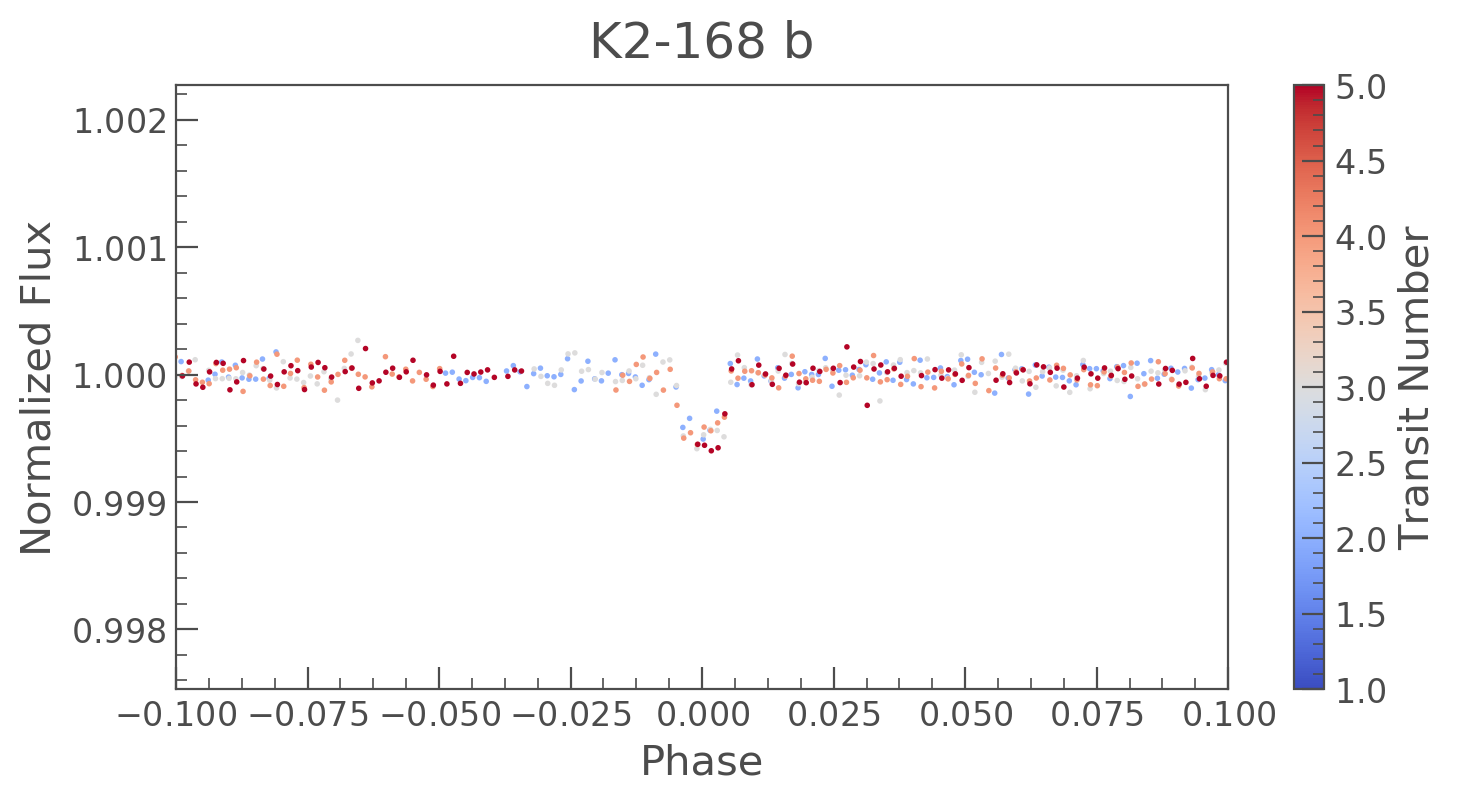

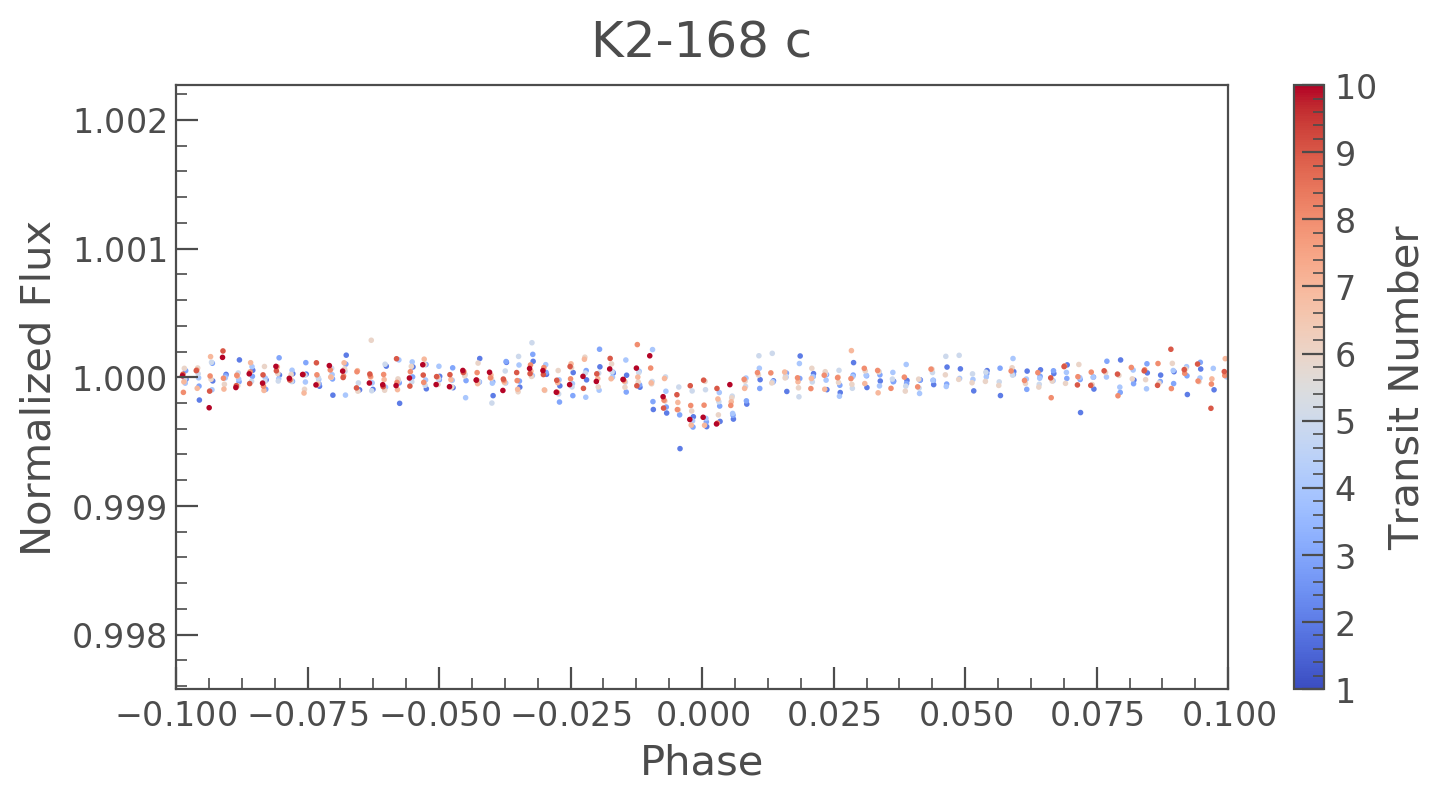

In [11]:
for jdx in range(2):
    mask = np.ones(len(lc.time), bool)
    for idx in list(set([0,1]) - set([jdx])):
        p1 = np.exp(samples['logP__{}'.format(idx)].mean())
        t01 = samples['t0__{}'.format(idx)].mean()
        d1 = 0.5
        x_fold = (lc.time - t01 + 0.5*p1) % p1 - 0.5*p1
        mask &= (np.abs(x_fold) > d1/2)
        
    Period = np.exp(samples['logP__{}'.format(jdx)].mean())
    T0 = samples['t0__{}'.format(jdx)].mean()
    
    phase = (T0 % Period) / Period
    fold_time = np.asarray(((lc.time - phase * Period) / Period) % 1)
    fold_time[fold_time > 0.5] -= 1
    idxs = np.where((np.gradient(fold_time) < -0.4) & (fold_time < 0))[0]
    colors = np.asarray(list(itertools.chain.from_iterable([np.ones(len(b), int) + int(i) for i, b in enumerate(np.array_split(fold_time, idxs))])))
    plt.figure()
    plt.scatter(fold_time[mask], lc.flux[mask], c=colors[mask], cmap='coolwarm', s=1)
    cbar = plt.colorbar()
    plt.xlabel('Phase')
    plt.ylabel('Normalized Flux')
    cbar.set_label('Transit Number')
    plt.title('K2-168 {}'.format(letters[jdx]))
    plt.xlim(-0.1, 0.1)

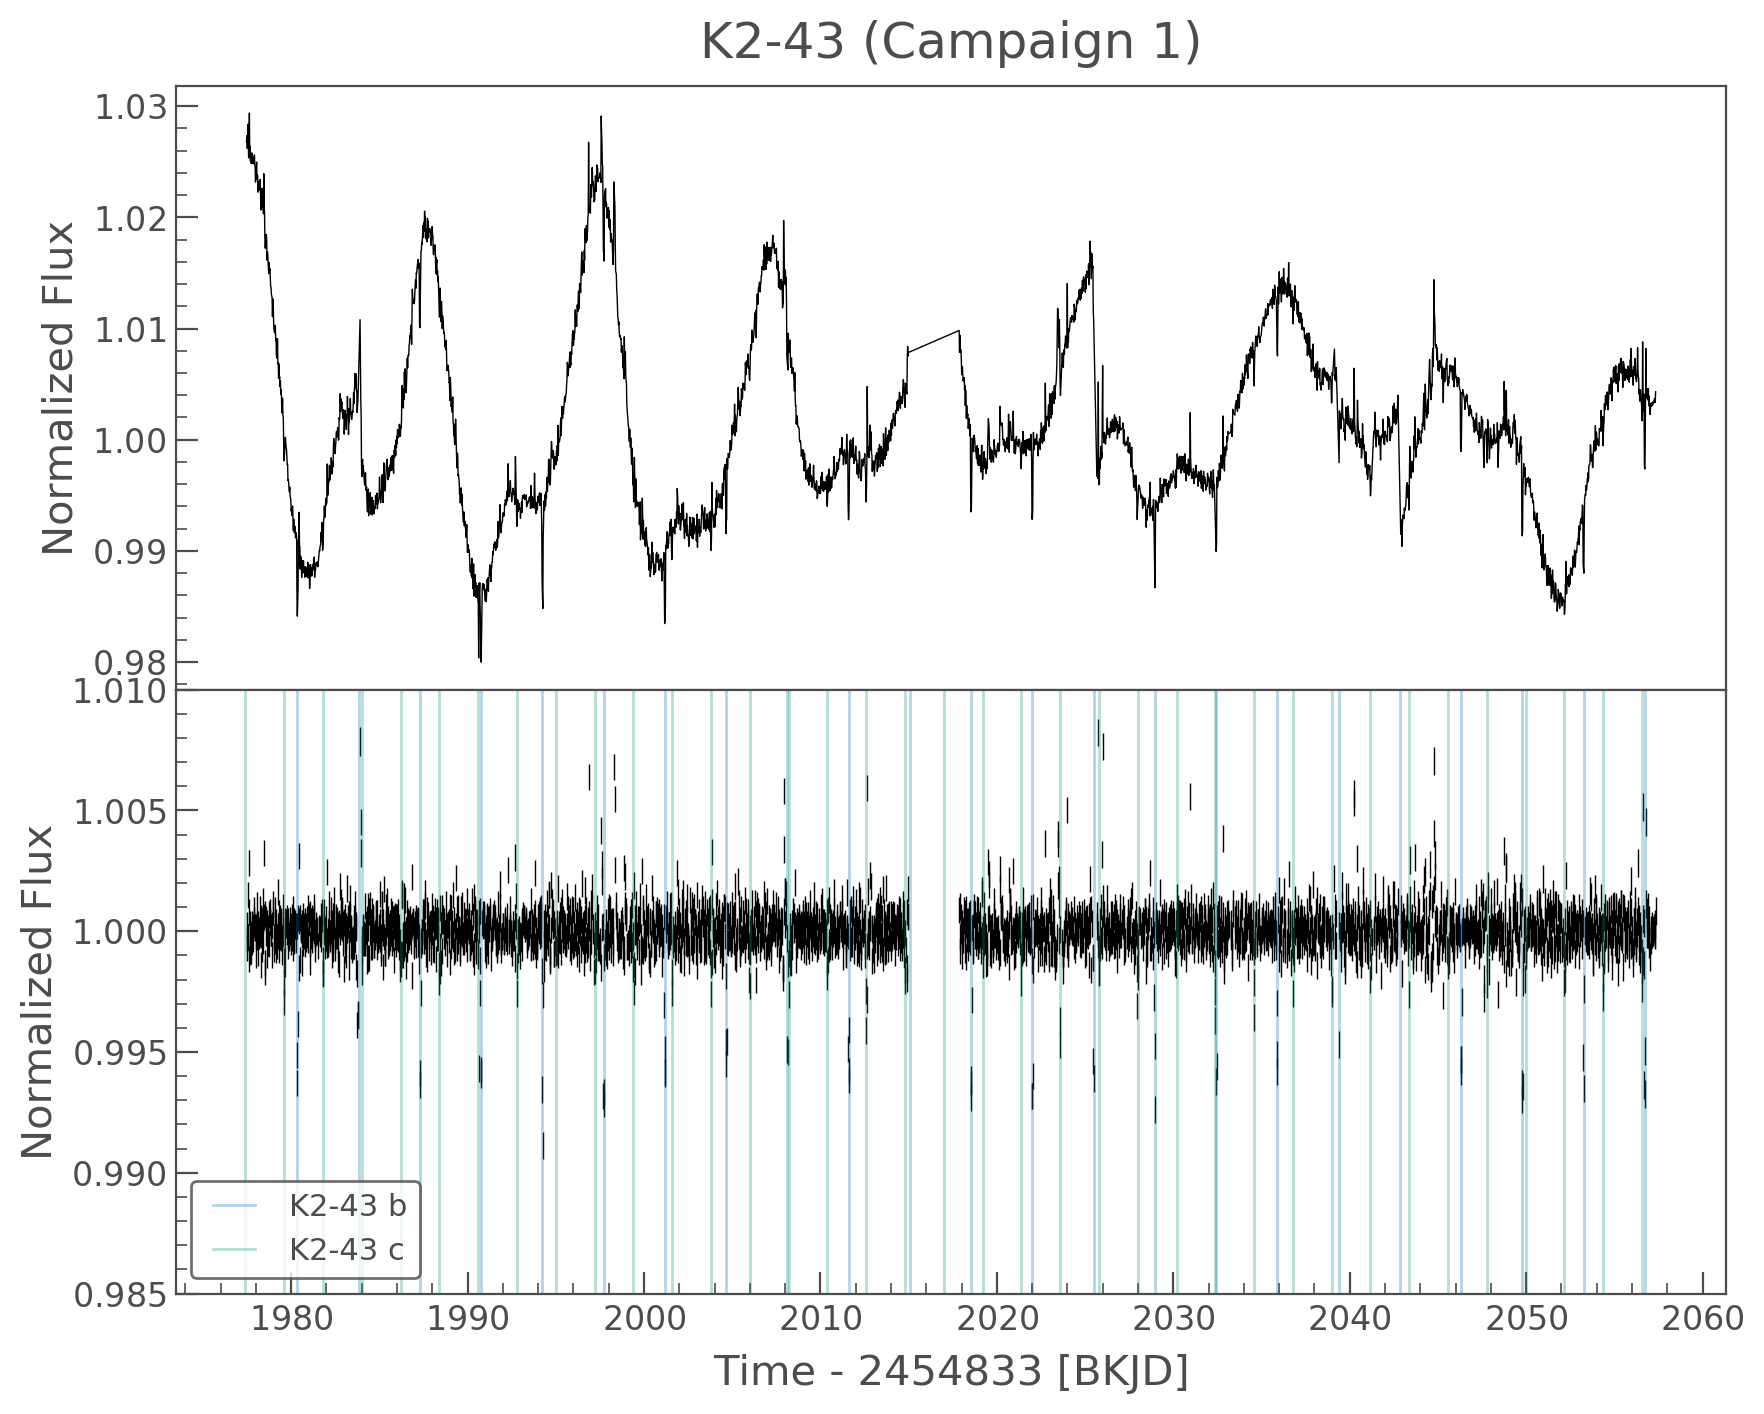

In [15]:
samples = pickle.load(open('{}/results/K2-43_samples.p'.format(threemultis.PACKAGEDIR), 'rb'))

fig = plt.figure(figsize=(10, 8))
ax = plt.subplot2grid((2, 1), (0, 0), fig=fig)
lc = pickle.load(open('{}/results/K2-43.p'.format(threemultis.PACKAGEDIR), 'rb'))
(lc + (np.median(lc.meta['pred_mu'], axis=0) * 1e-6)).flatten(1001).plot(ax=ax, c='k', label='')
ax.set_xlabel('')
ax.get_xaxis().set_visible(False)


ax.set_title('K2-43 (Campaign 1)')




    
ax = plt.subplot2grid((2, 1), (1, 0), fig=fig)
(lc).errorbar(ax=ax, c='k', label='')
for jdx in range(2):
    Period = np.exp(samples['logP__{}'.format(jdx)].mean())
    T0 = samples['t0__{}'.format(jdx)].mean()
    bls = BoxLeastSquares(lc.time, lc.flux)
    tt = bls.compute_stats(Period, 0.5, T0)['transit_times']
    for t in tt:
        if (t == tt[0]):
            ax.axvline(t, c='C{}'.format(jdx + 1), alpha=0.3, lw=1, label='K2-43 {}'.format(letters[jdx]))
        else:
            ax.axvline(t, c='C{}'.format(jdx + 1), alpha=0.3, lw=1)
ax.legend()
ax.set_xlabel('')

ax.set_xlabel('Time - 2454833 [BKJD]')
ax.xaxis.set_label_coords(0.5, -0.1)
ax.set_ylim(0.985, 1.01)

# ax = plt.subplot2grid((2, 1), (2, 0), colspan=2, fig=fig)


# p = lc.to_periodogram('bls', minimum_period=2, maximum_period=20, frequency_factor=1, duration=np.linspace(0.1, 0.9, 5))
# p.plot(ax=ax, label='')

# for jdx in range(2):
#     Period = np.exp(samples['logP__{}'.format(jdx)].mean())
#     for period in [Period, Period * 2, Period * 4, Period * 0.5, Period * 0.25, Period * 0.125, Period * (0.125/2)]:
#         if period == Period:
#             ax.axvline(period, c='C{}'.format(jdx + 1), alpha=0.5, lw=3, label='K2-43 {}'.format(letters[jdx]))
#         else:
#             ax.axvline(period, c='C{}'.format(jdx + 1), alpha=0.3, lw=3, ls='--')

# ax.set_xlim(2, 20)
# ax.legend()

plt.subplots_adjust(hspace=0)
plt.savefig('../threemultis/results/figures/K2-43_lc.png', dpi=200, bbox_inches='tight')
plt.savefig('../threemultis/results/figures/K2-43_lc.pdf', bbox_inches='tight')

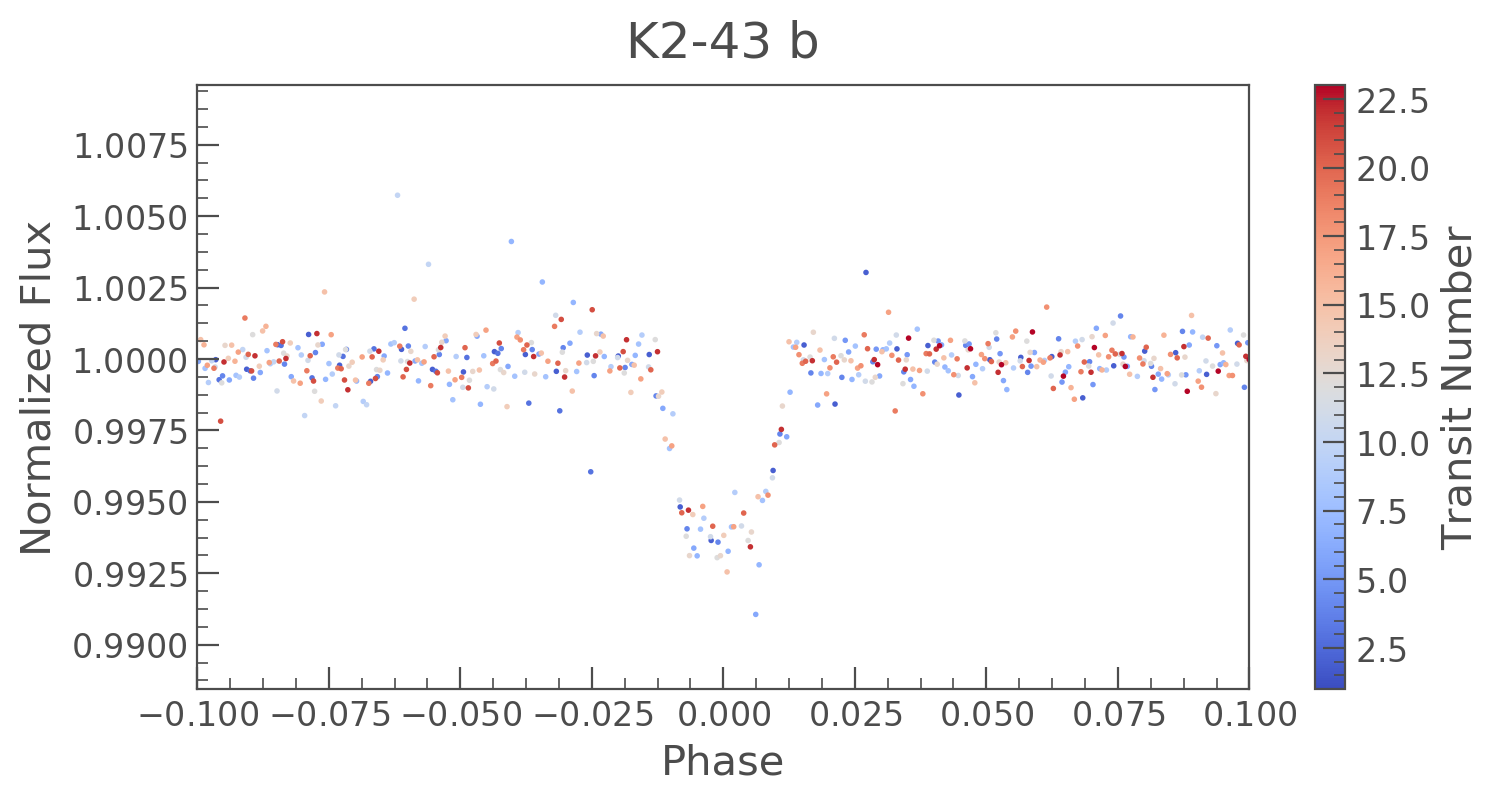

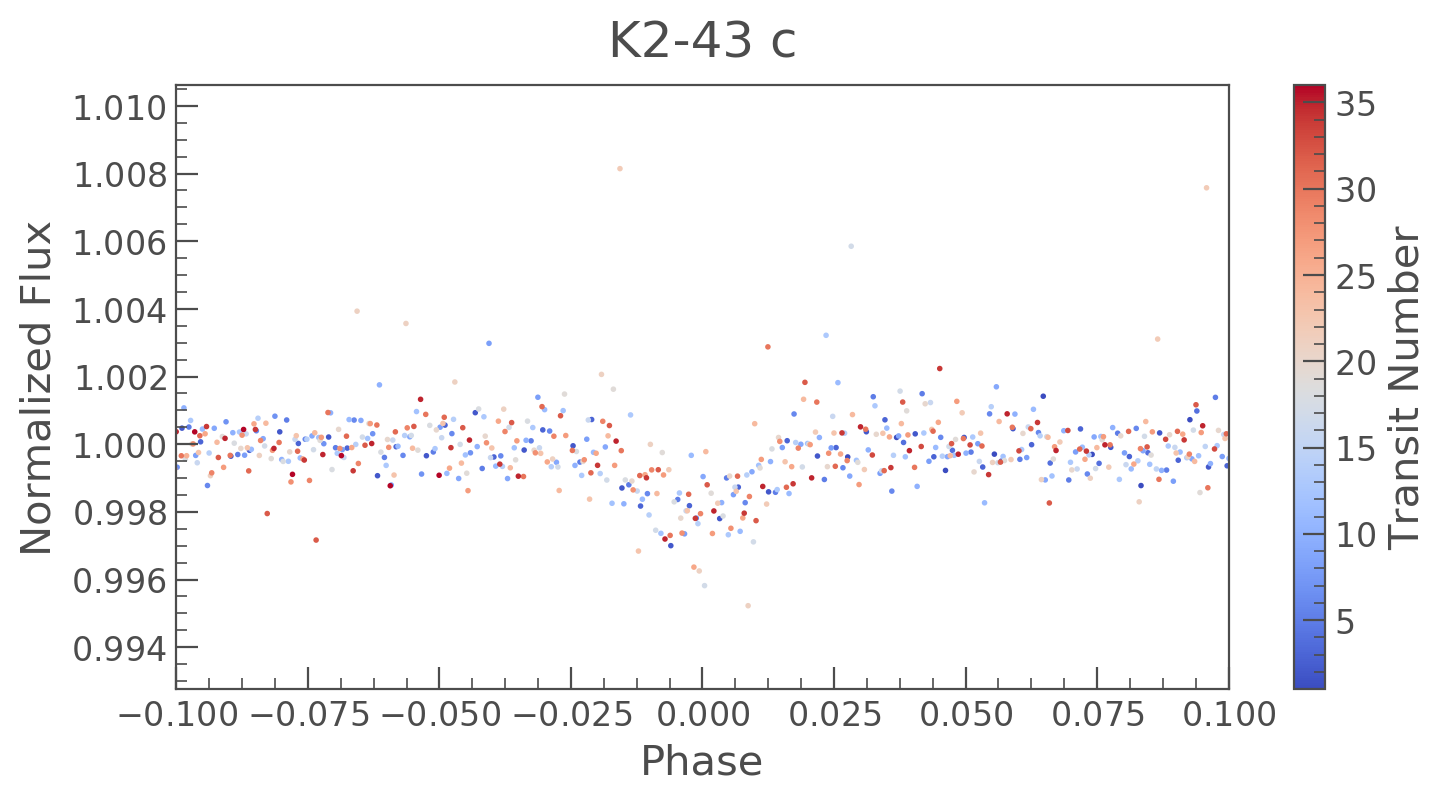

In [13]:
for jdx in range(2):
    mask = np.ones(len(lc.time), bool)
    for idx in list(set([0,1]) - set([jdx])):
        p1 = np.exp(samples['logP__{}'.format(idx)].mean())
        t01 = samples['t0__{}'.format(idx)].mean()
        d1 = 0.5
        x_fold = (lc.time - t01 + 0.5*p1) % p1 - 0.5*p1
        mask &= (np.abs(x_fold) > d1/2)
        
    Period = np.exp(samples['logP__{}'.format(jdx)].mean())
    T0 = samples['t0__{}'.format(jdx)].mean()
    
    phase = (T0 % Period) / Period
    fold_time = np.asarray(((lc.time - phase * Period) / Period) % 1)
    fold_time[fold_time > 0.5] -= 1
    idxs = np.where((np.gradient(fold_time) < -0.4) & (fold_time < 0))[0]
    colors = np.asarray(list(itertools.chain.from_iterable([np.ones(len(b), int) + int(i) for i, b in enumerate(np.array_split(fold_time, idxs))])))
    plt.figure()
    plt.scatter(fold_time[mask], lc.flux[mask], c=colors[mask], cmap='coolwarm', s=1)
    cbar = plt.colorbar()
    plt.xlabel('Phase')
    plt.ylabel('Normalized Flux')
    cbar.set_label('Transit Number')
    plt.title('K2-43 {}'.format(letters[jdx]))
    plt.xlim(-0.1, 0.1)

In [ ]:
for planet, p in params.iterrows():
    t1 = (lc.time[0] - ((lc.time[0] - p.T0)// p.Period) * p.Period)
    ls = t1 + np.arange(int((lc.time[-1] - lc.time[0])/p.Period))
    ax.axvline(ls, c='C{}'.format(planet + 1), ls='--', lw=2, alpha=0.5 )

In [ ]:
t1

In [ ]:
t1 + np.arange(int((lc.time[-1] - lc.time[0])/p.Period))

In [ ]:
np.round(7.4500177/3.3596055, 3)

In [ ]:
from fractions import Fraction

In [ ]:
Fraction(2.218).limit_denominator(6)

In [ ]:
11/5